# Example of high-level interface

In [42]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
from tqdm import tqdm
from itertools import compress
from tqdm import tqdm
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
DEVICE = 'cuda:0'
SIGMA=0.006

## Toy generative model

In [44]:
def model(z):
    z = (z-0.5) * 2
    
    sigma1 = (z[0]**2 + z[1]**2)**0.5
    sigma2 = max(z[0], z[2])
    sigma3 = max(z[1]*2, z[2])
    
    sigma1 = 10**(sigma1*4-1)
    sigma2 = 10**(sigma2*4-1)
    sigma3 = 10**(sigma3*4-1)
    
    mu_sig = np.array([sigma1, sigma2, sigma3])
    mu_bg = 1.3
    
    x = np.random.poisson(mu_sig + mu_bg)
    return x

In [45]:
z0 = np.array([0.5,0.5,0.5])
x0 = model(z0)
print(x0, z0)

[2 0 1] [0.5 0.5 0.5]


## Automatic inference 1-dim and 2-dim posteriors

In [46]:
ds = swyft.DataStore().init(zdim = 3, xdim = (3,))

Creating empty datastore: None
...don't forget to run `init` to set up storage parameters.
Datastore initialized.


In [47]:
td = swyft.TrainData(x0, zdim = 3, datastore = ds, nsamples = 1000)

Constrained posterior area: 1.0
Adding 1017 new samples. Run simulator!


In [48]:
ds.simulate(model)

Simulate: 100%|██████████| 1017/1017 [00:00<00:00, 1242.68it/s]


In [58]:
re = swyft.RatioEstimation(zdim = 3, traindata = td, combinations = [[0], [1], [2]])

In [59]:
re.train(max_epochs = 1, nbatch = 32)

Start training
LR iteration 0
Total epochs: 1
Validation losses: [8.275754570960999]
LR iteration 1
Total epochs: 1
Validation losses: [8.26226282119751]
LR iteration 2
Total epochs: 1
Validation losses: [8.260860204696655]


No1


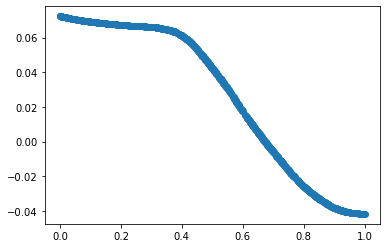

In [75]:
x, lnL = re.posterior(0, x0 = x0)
plt.scatter(x, lnL)

## Plot posteriors

TypeError: _eval_post1d() missing 1 required positional argument: 'x0'

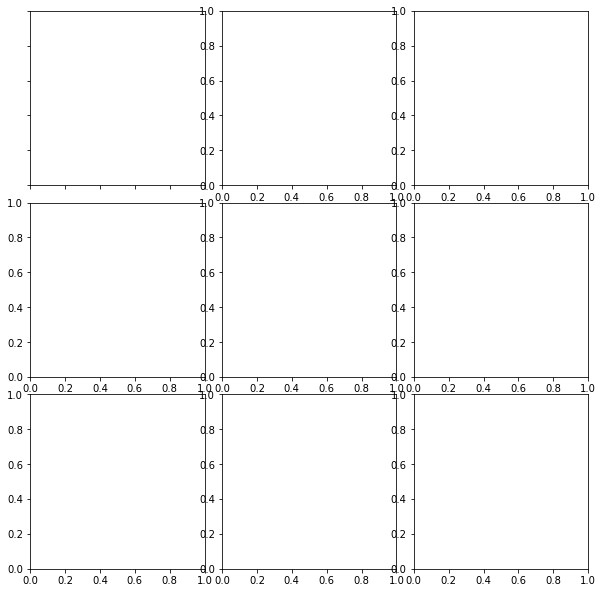

In [41]:
swyft.corner(re, z0 = z0, tag = 'default', cmap = 'Greys', params = [0, 1, 2], dim = 10)